In [146]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt
from scipy.special import erf 
import os

In [147]:
def file_reader(fname_in,repeat):
    first = True
    for i_rep in range(repeat):
        fname = fname_in + "_i_%d.npz" % (i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
    if not first:    
        return succ_prob_avg/Ntot, p_list, Ntot
    else:
        return 0,0,0

## 7-qubit

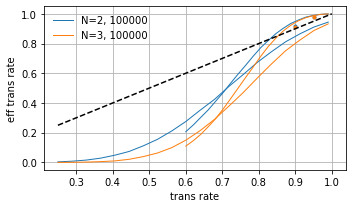

In [158]:
repeat = 100
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,4)
p_r = 0.1
plt.figure(1,figsize=(5,3))

bdy = True
Nl = 2
first = True

for i_L, Nl in enumerate(Nl_list):

    f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    plt.plot(1-p_list_even,succ_prob_even,".", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        
    f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)
    plt.plot(1-p_list_even,succ_prob_even,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))

    f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
    
    plt.plot((1-p_list),succ_prob_odd,"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))

f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.25,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(7e-1,9e-1)
# # plt.ylim(6e-1,1.01)
# plt.xlim(8e-1,9e-1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## Eff trans vs. distance

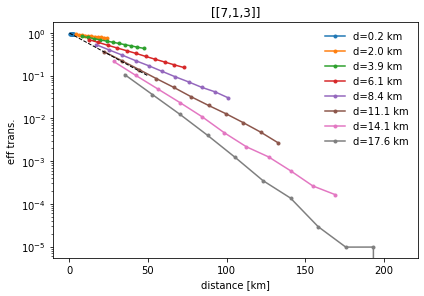

In [160]:
repeat = 100
p_r = 0.05
Nl_list = np.arange(2,13,1)
ind_p_list = np.arange(0,15,2)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    # f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    # succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)
        
    f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
    succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater
    
for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10(1-p_list[ind_p])
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="d=%.1f km" % (unit_dist))

x_list = np.linspace(0.01,50,100)
# plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,10**(-0.2*x_list/10),"k--",linewidth=1)
# plt.plot(x_list,10**(-x_list/10),"k--",linewidth=1)
# plt.plot(x_list,-np.log2(1-10**(-0.01*x_list)),"k--",linewidth=1)
# plt.plot(x_list,10**(0.02*x_list),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.yscale("log")

# plt.ylim(1e-1,2e0)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,50)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[7,1,3]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

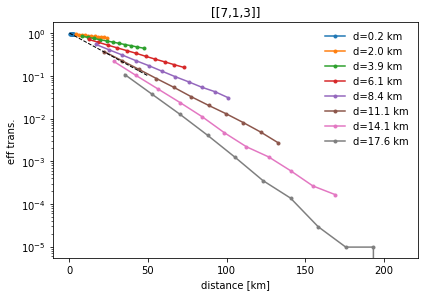

In [161]:
repeat = 100
p_r = 0.05
Nl_list = np.arange(2,13,1)
ind_p_list = np.arange(0,15,2)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    # f1 = "data_7q/" + "even_Nl_%d" % (Nl)
    f1 = "old_data/data_7q/" + "obc_Nl_%d" % (Nl)
    succ_prob_even, p_list_even, Ntot_even = file_reader(f1,repeat) 
    # succ_prob_repeater = succ_prob_even[np.argwhere(p_list_even==p_r)]
    succ_prob_repeater = np.interp(p_r,p_list_even, succ_prob_even)
        
    f2 = "old_data/data_7q/" + "obc_p_%.2f_Nl_%d" % (p_r,Nl)
    succ_prob_odd, p_list, Ntot = file_reader(f2,repeat) 
    succ_prob_avg[:,i_L] = succ_prob_odd[ind_p_list]*succ_prob_repeater
    
for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10(1-p_list[ind_p])
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="d=%.1f km" % (unit_dist))

x_list = np.linspace(0.01,50,100)
# plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,10**(-0.2*x_list/10),"k--",linewidth=1)
# plt.plot(x_list,10**(-x_list/10),"k--",linewidth=1)
# plt.plot(x_list,-np.log2(1-10**(-0.01*x_list)),"k--",linewidth=1)
# plt.plot(x_list,10**(0.02*x_list),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.yscale("log")

# plt.ylim(1e-1,2e0)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,50)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[7,1,3]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

## 48-qubit ldpc

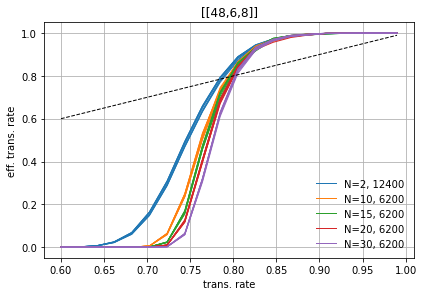

In [7]:
repeat = 124
Nl_list = [2,10,15,20,30]#
# Nl_list =np.arange(2,9,1)
# Nl_list = [20]

plt.figure(1,figsize=(6,4))

bdy = True
Nl = 2
first = True
for i_rep in range(repeat):
    if bdy:
        fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
    else:
        fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

    if os.path.exists(fname):
        npz_file = np.load(fname)
        succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

        if first :
            first = False
            succ_prob_X_2 = np.zeros((len(p_list),6))
            succ_prob_Z_2 = np.zeros((len(p_list),6))
            Ntot = 0

        succ_prob_X_2 += succ_prob_X*Nrep
        succ_prob_Z_2 += succ_prob_Z*Nrep
        Ntot += Nrep

succ_prob_X_2 /= Ntot
succ_prob_Z_2 /= Ntot
succ_prob_2 = np.mean(succ_prob_X_2*succ_prob_Z_2,axis=1)


for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (i_L))#,label="N=%d, %d" % (Nl,Ntot))        
        # # plt.fill_between(1-p_list,succ_prob_avg-xzerr,succ_prob_avg+xzerr)
        # plt.plot(1-p_list,succ_prob_X_avg,"-", color="C%d" % (2*i_L), linewidth=1,label="X")
        # plt.plot(1-p_list,succ_prob_Z_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))

        # plt.plot(-50*(Nl)*np.log10(1-p_list),succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))
        # plt.plot(-50*(Nl)*np.log10(1-p_list),succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))

        # plt.plot(1-p_list,succ_prob_2**(Nl/2),"k--", linewidth=1)




# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.6,0.99,100)
plt.plot(x_list,x_list,"k--",linewidth=1)
# plt.plot(x_list,x_list**2,"k--",linewidth=1)
# plt.fill_between(x_list,x_list**2,1+0*x_list,color="gray",alpha=0.3)
# x_list = np.linspace(0.,230,100)
# plt.plot(x_list,10**(-0.02*x_list),"k--",linewidth=1)
# plt.xlabel("distance [km]")
plt.xlabel("trans. rate")
# plt.ylabel(r"$p_{loss}$")
plt.ylabel("eff. trans. rate")
# plt.yscale("log")

# plt.ylim(1e-4,2e0)
# # # plt.ylim(6e-1,1.01)
# plt.xlim(0.0,250)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_48q.pdf")
plt.show()

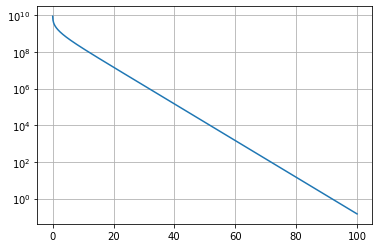

In [56]:
x= np.linspace(0.01,100,1000)
y = -np.log2(1-10**(-x/10))
plt.plot(x,y*10**9)
plt.yscale("log")
# plt.ylim(10**(-10),10)
plt.grid()
plt.show()

distance

/tmp/ipykernel_16257/616749934.py:48: RuntimeWarning: divide by zero encountered in log2
  plt.plot(Nl_list*unit_dist,-np.log2(1-succ_prob_avg[i_p,:]),".-",label="d=%.1f km" % (unit_dist))
/tmp/ipykernel_16257/616749934.py:48: RuntimeWarning: divide by zero encountered in log2
  plt.plot(Nl_list*unit_dist,-np.log2(1-succ_prob_avg[i_p,:]),".-",label="d=%.1f km" % (unit_dist))


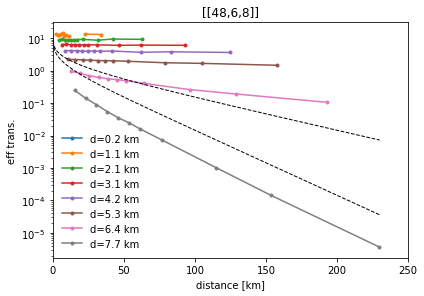

In [61]:
repeat = 124
# Nl_list = np.array([2,10,15,20,30])
Nl_list = np.concatenate((np.arange(2,9,1),np.array([10,15,20,30])))
ind_p_list = np.arange(0,15,2)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep

    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        succ_prob_avg[:,i_L]=(np.mean(succ_prob_X_avg,axis=1)[ind_p_list]* np.mean(succ_prob_Z_avg,axis=1)[ind_p_list])
        # plt.plot(-50*Nl*np.log(1-p_list[ind_p]),succ_prob_avg,"b.")#,label="N=%d, %d" % (Nl,Ntot))
        # # plt.plot(p_list,1-succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))

p_r = 0.
for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10(1-p_list[ind_p]+p_r)
    if unit_dist>0:
        plt.plot(Nl_list*unit_dist,-np.log2(1-succ_prob_avg[i_p,:]),".-",label="d=%.1f km" % (unit_dist))
    # plt.plot(Nl_list*unit_dist,1/(unit_dist*succ_prob_avg[i_p,:]),".-",label="d=%.1f km" % (unit_dist))


x_list = np.linspace(0.01,230,1000)
plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,-np.log2(1-10**(-0.01*x_list)),"k--",linewidth=1)
# plt.plot(x_list,10**(0.02*x_list),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.yscale("log")

# plt.ylim(1e-1,2e0)
# # plt.ylim(1e-1,100)
plt.xlim(0.0,250)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

/tmp/ipykernel_16257/1016679451.py:43: RuntimeWarning: divide by zero encountered in log2
  plt.plot(Nl*dist,-np.log2(1-succ_prob_avg),".-",label="Nl=%d" % (Nl))
/tmp/ipykernel_16257/1016679451.py:43: RuntimeWarning: divide by zero encountered in log2
  plt.plot(Nl*dist,-np.log2(1-succ_prob_avg),".-",label="Nl=%d" % (Nl))


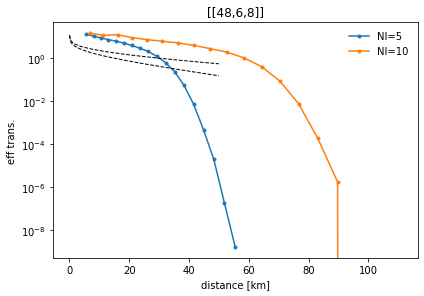

In [73]:
## single repeater

repeat = 124
# Nl_list = np.array([2,10,15,20,30])
Nl_list = [5,10]

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep

    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        succ_prob_avg=(np.mean(succ_prob_X_avg,axis=1)* np.mean(succ_prob_Z_avg,axis=1))    
        p_r = 0.
        dist = -50*np.log10(1-p_list+p_r)
        plt.plot(Nl*dist,-np.log2(1-succ_prob_avg),".-",label="Nl=%d" % (Nl))
        # plt.plot(Nl_list*unit_dist,1/(unit_dist*succ_prob_avg[i_p,:]),".-",label="d=%.1f km" % (unit_dist))


        
x_list = np.linspace(0.01,50,100)
plt.plot(x_list,-np.log2(1-10**(-0.02*x_list)),"k--",linewidth=1)
plt.plot(x_list,-np.log2(1-10**(-0.01*x_list)),"k--",linewidth=1)

# plt.plot(x_list,10**(0.02*x_list),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
# plt.ylabel("cost fn.")
plt.ylabel("eff trans.")
plt.yscale("log")

# plt.ylim(1e-1,2e0)
# # plt.ylim(1e-1,100)
# plt.xlim(0.0,250)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[48,6,8]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q_pr_0.pdf")
plt.show()

## Effect of boundary condition

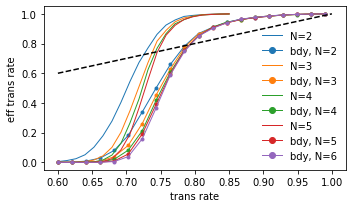

In [28]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,9)

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            Ntot += Nrep
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg*succ_prob_Z_avg,"-", color="C%d" % (i_L), linewidth=1,label="N=%d" % (Nl))

    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg_obc = np.zeros(len(p_list))
                succ_prob_Z_avg_obc = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg_obc += succ_prob_X*Nrep
            succ_prob_Z_avg_obc += succ_prob_Z*Nrep
            Ntot += Nrep
            # plt.plot(1-p_list,succ_prob_X,".", color="C%d" % (i_L))

    if not first:
        succ_prob_X_avg_obc /= Ntot
        succ_prob_Z_avg_obc /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg_obc*succ_prob_Z_avg_obc,".-", color="C%d" % (i_L), linewidth=1,label="bdy, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg_obc,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## new logical operator comparison

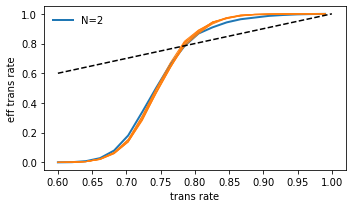

In [119]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = [2]
bdy = True

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_48q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros(len(p_list))
                succ_prob_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            Ntot += Nrep
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        plt.plot(1-p_list,succ_prob_X_avg*succ_prob_Z_avg,"-", color="C%d" % (2*i_L), linewidth=2,label="N=%d" % (Nl))

    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="new,N=%d, %d" % (Nl,Ntot))        
        
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

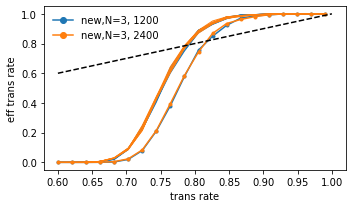

In [133]:
### efficient code

repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = [3]
bdy = True

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(24,24+repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (2*i_L),label="new,N=%d, %d" % (Nl,Ntot))        
        
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (2*i_L+1),label="new,N=%d, %d" % (Nl,Ntot))        
        
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## 46-qubit code

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


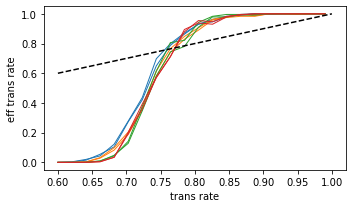

In [304]:
repeat = 24
Nl_list = np.arange(2,6,1)

plt.figure(1,figsize=(5,3))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_46q/" + "obc_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_46q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),2))
                succ_prob_Z_avg = np.zeros((len(p_list),2))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

        # xzerr = ((xerr/succ_prob_X_avg)**2+(zerr/succ_prob_Z_avg)**2)**0.5* succ_prob_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="N=%d, %d" % (Nl,Ntot))        
        # plt.fill_between(1-p_list,succ_prob_avg-xzerr,succ_prob_avg+xzerr)
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))
        # plt.plot(1-p_list,(succ_prob_X_2*succ_prob_Z_2),"k--")#, color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))


# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")
# plt.yscale("log")
# plt.ylim(6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(7e-1,1)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## 126-qubit

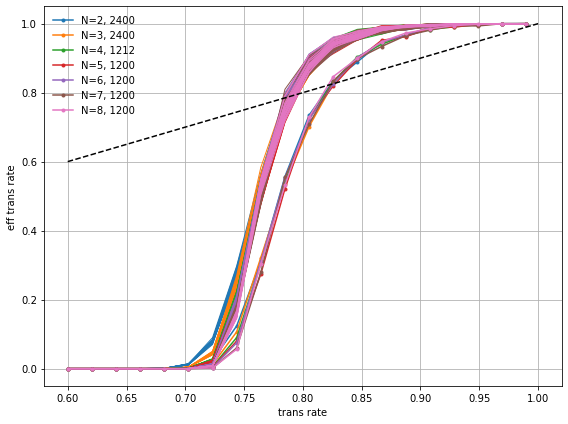

In [19]:
repeat = 24
Nl_list = np.arange(2,9,1)

plt.figure(1,figsize=(8,6))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_126q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_126q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),28))
                succ_prob_Z_avg = np.zeros((len(p_list),28))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

        # xzerr = ((xerr/succ_prob_X_avg)**2+(zerr/succ_prob_Z_avg)**2)**0.5* succ_prob_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="N=%d, %d" % (Nl,Ntot))        
        # plt.fill_between(1-p_list,succ_prob_avg-xzerr,succ_prob_avg+xzerr)
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))
        # plt.plot(1-p_list,(succ_prob_X_2*succ_prob_Z_2),"k--")#, color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))


# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")
# plt.yscale("log")
# plt.ylim(6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(7e-1,1)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

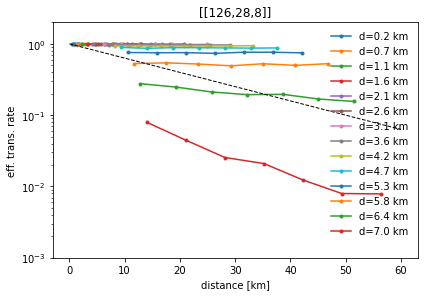

In [330]:
repeat = 24
# Nl_list = [2,10,15,20,30]#
Nl_list = np.arange(2,9,1)
ind_p_list = np.arange(0,14,1)#[8,11,14]
succ_prob_avg = np.zeros((len(ind_p_list),len(Nl_list)))

plt.figure(1,figsize=(6,4))
bdy = True
for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_126q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_126q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']

            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),28))
                succ_prob_Z_avg = np.zeros((len(p_list),28))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep

    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        succ_prob_avg[:,i_L]=(np.mean(succ_prob_X_avg,axis=1)[ind_p_list]* np.mean(succ_prob_Z_avg,axis=1)[ind_p_list])
        # plt.plot(-50*Nl*np.log(1-p_list[ind_p]),succ_prob_avg,"b.")#,label="N=%d, %d" % (Nl,Ntot))
        # # plt.plot(p_list,1-succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))

for i_p, ind_p in enumerate(ind_p_list):
    unit_dist = -50*np.log10(1-p_list[ind_p])
    plt.plot(Nl_list*unit_dist,succ_prob_avg[i_p,:],".-",label="d=%.1f km" % (unit_dist))

x_list = np.linspace(0.,60,100)
plt.plot(x_list,10**(-0.02*x_list),"k--",linewidth=1)
plt.xlabel("distance [km]")
# plt.ylabel(r"$p_{loss}$")
plt.ylabel("eff. trans. rate")
plt.yscale("log")

plt.ylim(1e-3,2e0)
# # # plt.ylim(6e-1,1.01)
# plt.xlim(0.0,250)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.title("[[126,28,8]]")
# plt.grid()
# plt.savefig("figs_Hassan/eff_loss_rate_vs_distance_48q.pdf")
plt.show()

## [[254,28,d]]

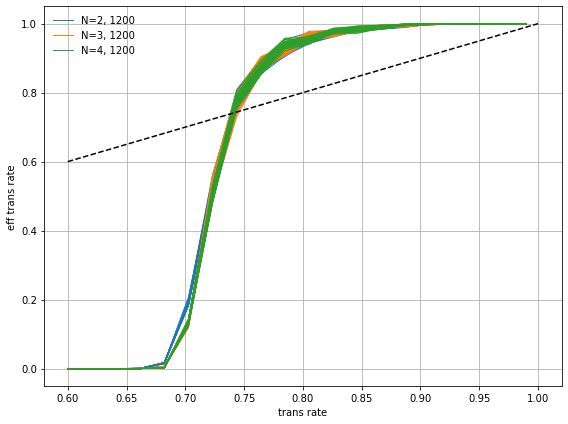

In [24]:
repeat = 24
Nl_list = np.arange(2,5,1)

plt.figure(1,figsize=(8,6))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_254q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_254q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),28))
                succ_prob_Z_avg = np.zeros((len(p_list),28))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

        # xzerr = ((xerr/succ_prob_X_avg)**2+(zerr/succ_prob_Z_avg)**2)**0.5* succ_prob_avg
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,np.mean(succ_prob_avg,axis=1),"-", color="C%d" % (i_L), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (i_L),label="N=%d, %d" % (Nl,Ntot))        
        # plt.fill_between(1-p_list,succ_prob_avg-xzerr,succ_prob_avg+xzerr)
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))
        # plt.plot(1-p_list,(succ_prob_X_2*succ_prob_Z_2),"k--")#, color="C%d" % (i_L), linewidth=1,label="X, N=%d" % (Nl))
        # plt.plot(1-p_list,succ_prob_Z_avg,"x", color="C%d" % (i_L), linewidth=1,label="Z, N=%d" % (Nl))


# f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")
# plt.yscale("log")
# plt.ylim(6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(7e-1,1)

# plt.grid()
plt.legend(frameon=False,markerscale=1)
plt.tight_layout()
plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()

## ldpc comparison

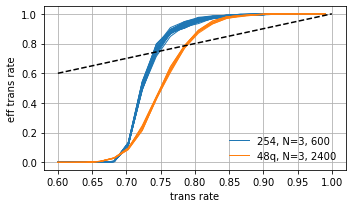

In [16]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = [3]
bdy = True

plt.figure(1,figsize=(5,3))

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_254q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_46q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),28))
                succ_prob_Z_avg = np.zeros((len(p_list),28))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg

        # xzerr = ((xerr/succ_prob_X_avg)**2+(zerr/succ_prob_Z_avg)**2)**0.5* succ_prob_avg
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L), linewidth=1)#, label="126,N=%d, %d" % (Nl,Ntot))  
        # plt.plot(1-p_list,succ_prob_word_avg,".-", color="C%d" % (i_L),label="N=%d, %d" % (Nl,Ntot))        
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (2*i_L), linewidth=1,label="254, N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (2*i_L),label="254,N=%d, %d" % (Nl,Ntot))        


    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_48q/" + "obc_qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        else:
            fname = "data_48q/" + "qres_Nl_%d_i_%d.npz" % (Nl,i_rep)
        
        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob_word_X, succ_prob_word_Z, succ_prob_X, succ_prob_Z, p_list, Nrep = npz_file['succ_prob_word_X'],npz_file['succ_prob_word_Z'], npz_file['succ_prob_X'], npz_file['succ_prob_Z'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_X_avg = np.zeros((len(p_list),6))
                succ_prob_Z_avg = np.zeros((len(p_list),6))
                succ_prob_word_X_avg = np.zeros(len(p_list))
                succ_prob_word_Z_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_X_avg += succ_prob_X*Nrep
            succ_prob_Z_avg += succ_prob_Z*Nrep
            succ_prob_word_X_avg += succ_prob_word_X*Nrep
            succ_prob_word_Z_avg += succ_prob_word_Z*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_X_avg /= Ntot
        succ_prob_Z_avg /= Ntot
        succ_prob_word_X_avg /= Ntot
        succ_prob_word_Z_avg /= Ntot
        # xerr = (succ_prob_X_avg*(1-succ_prob_X_avg)/Ntot)**0.5
        # zerr = (succ_prob_Z_avg*(1-succ_prob_Z_avg)/Ntot)**0.5
        succ_prob_avg = succ_prob_X_avg*succ_prob_Z_avg
        succ_prob_word_avg = succ_prob_word_X_avg*succ_prob_word_Z_avg
        plt.plot(1-p_list,succ_prob_avg[:,0],"-", color="C%d" % (2*i_L+1), linewidth=1,label="48q, N=%d, %d" % (Nl,Ntot))
        plt.plot(1-p_list,succ_prob_avg,"-", color="C%d" % (2*i_L+1), linewidth=1)#,label="N=%d, %d" % (Nl,Ntot))
        # plt.plot(1-p_list,succ_prob_word_avg,"--", color="C%d" % (2*i_L+1),label="48q,N=%d, %d" % (Nl,Ntot))        
        
x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
plt.grid()
plt.savefig("figs_Hassan/254_vs_48_N_2.pdf")
plt.show()

## toric code

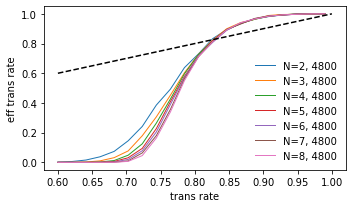

In [137]:
repeat = 24
# Nl_list = np.concatenate((np.arange(2,9),np.arange(10,41,5)))
Nl_list = np.arange(2,10)
L = 6 # dimension of tric code
plt.figure(1,figsize=(5,3))

bdy = True

for i_L, Nl in enumerate(Nl_list):
    first = True
    for i_rep in range(repeat):
        if bdy:
            fname = "data_toric/" + "obc_L%d_Nl_%d_i_%d.npz" % (L,Nl,i_rep)
        else:
            fname = "data_toric/" + "Nl_L%d_%d_i_%d.npz" % (L,Nl,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            succ_prob, p_list, Nrep = npz_file['succ_prob'], npz_file['p_list'], npz_file['Nrep']
            
            if first :
                first = False
                succ_prob_avg = np.zeros(len(p_list))
                Ntot = 0

            succ_prob_avg += succ_prob*Nrep
            Ntot += Nrep
            
    if not first:
        succ_prob_avg /= Ntot
        plt.plot(1-p_list,succ_prob_avg**2,"-", color="C%d" % (i_L), linewidth=1,label="N=%d, %d" % (Nl,Ntot))

f = lambda x: x**7 + 7*x**6*(1-x) + 7*3*x**5 * (1-x)**2 + 28 *x**4 * (1-x)**3 + 7*x**3 * (1-x)**4 
# plt.plot(1-p_list,f(1-p_list),"-")

x_list = np.linspace(0.6,1)
plt.plot(x_list,x_list,"k--")
# plt.yscale("log")
# plt.ylim(9.6e-1,1.01)
# plt.ylim(6e-1,1.01)
# plt.xlim(9e-1,1)
plt.xlabel("trans rate")
plt.ylabel("eff trans rate")

# plt.grid()
plt.legend(frameon=False,markerscale=2)
plt.tight_layout()
# plt.grid()
# plt.savefig("figs/qdot-threshold.pdf")
plt.show()